# Kernal Methods

当然可以。核方法（Kernel Methods）在机器学习中是一个非常重要的概念，特别是在支持向量机（Support Vector Machines, SVM）中。下面是核方法的详细介绍：

### 1. 基本概念

在许多机器学习算法中，特别是SVM，我们希望能够在高维空间中找到数据的线性决策边界。但原始的数据在低维空间中可能是非线性的，这时我们可以通过某种映射将数据从原始的低维空间映射到一个更高维的空间，在这个高维空间中数据变得线性可分。

但是，直接进行这种高维映射会面临巨大的计算挑战。这时，核方法应运而生，它允许我们在高维空间中间接地计算点积，而不需要显式地计算映射后的坐标。

### 2. 核函数

核函数是核方法的基石。给定两个向量$x$和$z$，核函数$K(x, z)$计算的是这两个向量在高维空间中的点积，而无需显式地知道映射后的坐标。

公式表示为：  
$$ K(x, z) = \phi(x) \cdot \phi(z) $$

其中，$\phi$是从原始空间到高维空间的映射函数。

### 3. 常见的核函数

- **线性核**：  
$$ K(x, z) = x \cdot z $$
  这实际上没有增加任何复杂性，因为它只是原始空间中的点积。

- **多项式核**：  
$$ K(x, z) = (x \cdot z + c)^d $$
  其中，$c$是常数，$d$是多项式的度。

- **高斯径向基函数（RBF）核**：  
$$ K(x, z) = \exp(-\gamma \|x - z\|^2) $$
  其中，$\gamma$是一个需要选择的参数。

- **Sigmoid核**：  
$$ K(x, z) = \tanh(\alpha x \cdot z + c) $$

### 4. 为什么核方法有效？

核方法的巧妙之处在于，它避免了直接在高维空间中的计算，从而减少了计算复杂性。例如，在SVM中，决策边界是由支持向量（数据的一个子集）定义的，通过使用核方法，我们只需要计算与这些支持向量相关的核函数，而不是整个数据集。

### 5. 总结

核方法提供了一个非常强大的框架，使我们能够隐式地在高维空间中工作，而无需直接进行高维计算。这使得许多机器学习算法，特别是SVM，能够处理非线性问题，并在各种任务上获得出色的性能。

# 密度估计的非参数方法

- 参数法：假定曲线的公式已知（带参数）
- 非参数法：不假设曲线的形状

密度估计的非参数方法试图估计数据的概率分布，而不假设数据是从某一具体的参数分布（如正态分布）中产生的。这种方法对数据的实际分布做最少假设。

常见的非参数密度估计方法有：

1. **直方图 (Histogram)**
2. **核密度估计 (Kernel Density Estimation, KDE)**
3. **K近邻密度估计 (K-Nearest Neighbors Density Estimation)**

### 1. **直方图 (Histogram)**

直方图是非参数统计的最简单形式，用于估计给定数据集的概率密度函数。直方图方法的主要思想是将整个值的范围划分为一系列连续的、不重叠的区间或"桶"，然后数每个桶中的数据点数量，以此作为估计的密度。

#### 数学公式:

假设数据集为 $X = \{x_1, x_2, ..., x_n\}$。将数据的范围分为 $k$ 个等宽的区间或桶。

对于第 $j$ 个桶，其宽度为 $h$，其中 $j = 1, 2, ..., k$。桶的高度或密度为:

$$ \hat{f}_j = \frac{n_j}{n \times h} $$

其中，$n_j$ 是落入第 $j$ 个桶的数据点的数量，$ n $ 是总的数据点数。

#### 数学基础：

- 把 $\mathbf{x}$ 理解成随机变量, 一个小区域 $\mathcal{R}$ 内的概率:
$$
P=\int_{\mathcal{R}} p(\mathbf{x}) d \mathbf{x}
$$
- 则 $N$ 个点中有 $K$ 个点落入区域 $\mathcal{R}$ 的概率服从二项式分布:
$$
p(K \mid N, P)=C_N^K P^K(1-P)^{N-K}
$$
- 如果 $N$ 与 $K$ 都很大, 则分布很窄（大数定律）, $K \approx N P$
$=$ 如果区域 $\mathcal{R}$ 体积 $(V)$ 很小, 则其内部 $p(\mathbf{x})$ 近似是个常数, $P \approx p(\mathbf{x}) V$
- 因此
$$
p(\mathbf{x}) \approx \frac{K}{N V}
$$
- 区间 $\mathcal{R}$ 选择：需较小以便其中的 $p(\mathbf{x})$ 基本是个常数，又需较大以使 $K$ 较大以便获得好的统计特性。

#### 代码实例:

以下是一个简单的例子，使用Python的`matplotlib`库来生成数据的直方图：

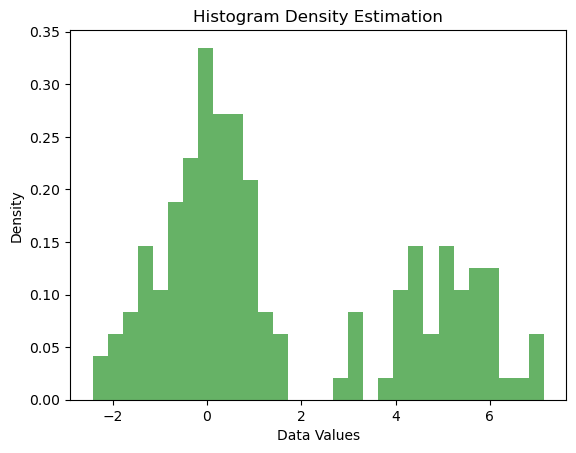

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据
data = np.concatenate([np.random.randn(100), np.random.randn(50) + 5])

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Histogram Density Estimation')
plt.show()

在上述代码中，`bins=30` 表示将数据范围划分为30个桶，`density=True` 表示我们希望绘制归一化的直方图，使其面积之和为1。

#### 注意:

直方图方法有一些局限性：
1. **选择的桶数和桶宽度会显著影响估计的密度**：过少的桶可能会导致过度平滑，损失数据的详细信息；而过多的桶可能会导致估计过于嘈杂。
2. **直方图的形状对区间的起点和终点敏感**：稍微改变数据范围的划分方式，直方图的形状可能会有很大的不同。
3. **直方图方法不适用于高维数据**：在高维空间中，数据点很少落入每个桶中，因此直方图方法不适用于高维数据。

尽管直方图方法存在上述局限性，但由于其简单性和直观性，它仍然是探索性数据分析中的常用工具。对于更精确的密度估计，通常会考虑使用核密度估计或其他非参数方法。

### 2. 核密度估计 (KDE):

核密度估计 (KDE) 是一种非参数的密度估计方法，广泛应用于统计学和数据分析中，用于估计一个变量的概率密度函数。

#### 基本思想:

KDE的核心思想是，在每个观测数据点处“放置”一个平滑的局部近似（通常是某种形式的核函数，如高斯核）。通过叠加所有这些核函数，我们得到一个连续、平滑的概率密度函数的估计。

#### 数学公式:

给定一个数据集 $X = \{x_1, x_2, ..., x_n\}$，核密度的估计形式为：

$$ \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^n K\left(\frac{x-x_i}{h}\right) $$

其中：

- $ K $ 是核函数，可以是多种形式，如高斯核、Epanechnikov核等。
- $ h $ 是带宽参数，它决定了每个核的宽度或平滑程度。带宽的选择对估计结果具有很大的影响：太小的带宽可能导致估计过于嘈杂，而太大的带宽可能导致估计过于平滑，从而掩盖数据中的结构。

#### 数学基础

- 固定区域 $\mathcal{R}$ 的体积 $V$, 从已知数据中估计 $K$ 
- $\mathcal{R}$ 为 $\mathrm{x}$ 空间边长为 $h$ 的小立方块, 定义核函数（Parzen windo）
$$
k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right)=\left\{\begin{array}{lc}
1, & \text { if }\left|\dfrac{x_i-x_{n, i}}{h}\right|<\frac{1}{2} \\
0, & \text { otherwise }
\end{array}\right.
$$

则 
$$
\begin{aligned}
&  K=\sum_n k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right) \\
& p(\mathbf{x})=\frac{1}{N} \sum_n \frac{1}{h^D} k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right)
\end{aligned}
$$
- 可以不把公式理解成落到以 $\mathbf{x}$ 为中心的cube有多少数据点, 而是 $\mathbf{x}$ 落到多少个以数据点 $\mathbf{x_n}$ 为中心的cube。

- 为了避免得到不连续的 $p(\mathbf{x})$, 可采用光滑的核函数 $k\left(\mathbf{x}, \mathbf{x}_n\right)$口 如高斯函数
$$
p(\mathbf{x})=\frac{1}{N} \sum_n \frac{1}{\left(2 \pi h^2\right)^{D / 2}} \exp \left(-\frac{\left|\mathbf{x}-\mathbf{x}_n\right|^2}{2 h^2}\right)
$$
$h$ acts as a smoother.

- 任何满足 $ k(\mathbf{u}) \geq 0, \quad \int k(\mathbf{u}) d \mathbf{u}=1 $ 的 $k(\mathbf{u})$ 都可以作为核函数。
#### 代码实例:

以下是一个使用Python的`scikit-learn`库进行核密度估计的例子：


在上述代码中，我们使用了高斯核，并选择了0.5作为带宽参数。实际应用中，可能需要多次尝试不同的带宽以获得最佳的密度估计。

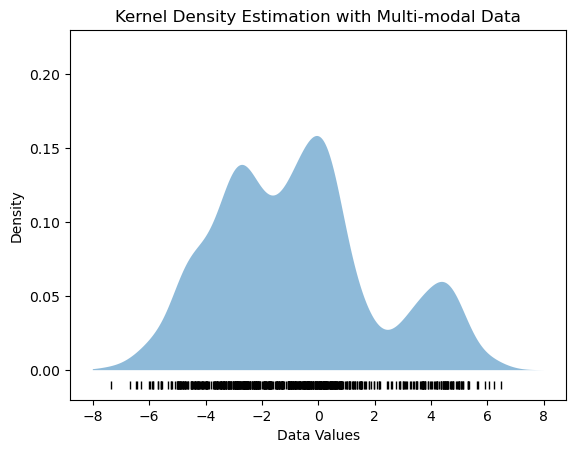

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# 生成三个高斯分布的混合数据
data1 = np.random.normal(loc=-3, scale=1.5, size=300)  # 均值为-3, 标准差为1.5
data2 = np.random.normal(loc=0, scale=0.8, size=200)   # 均值为0, 标准差为0.8
data3 = np.random.normal(loc=4, scale=1.2, size=100)   # 均值为4, 标准差为1.2

# 合并数据
data = np.concatenate([data1, data2, data3])

# 使用KDE进行密度估计
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data[:, np.newaxis])
x_d = np.linspace(-8, 8, 1000)
log_density = kde.score_samples(x_d[:, np.newaxis])

# 绘制估计的密度
plt.fill_between(x_d, np.exp(log_density), alpha=0.5)
plt.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.23)  # 调整y轴的范围以更好地展示数据
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation with Multi-modal Data')
plt.show()


在上述代码中，我们使用了高斯核，并选择了0.5作为带宽参数。实际应用中，可能需要多次尝试不同的带宽以获得最佳的密度估计。

#### 注意事项:

- 带宽的选择对KDE的结果具有决定性的影响。常见的方法是使用交叉验证来选择最佳的带宽。
- KDE对于多模态（多峰值）数据特别有用，因为它可以捕捉到这种结构，而其他简单的方法，如直方图，可能会错过。
- 与直方图不同，KDE产生的是一个连续的概率密度函数估计，不受特定的区间划分的约束。

### 1. KNN密度估计概述

KNN，即k-近邻（k-nearest neighbors）方法，是一种简单但强大的非参数统计方法，常用于分类、回归以及密度估计。在密度估计的上下文中，KNN方法估计一个点的密度为其k个最近邻的平均密度。

### 2. 数学描述

设我们有一个数据集 $ X = \{x_1, x_2, ..., x_n\} $。对于任意点 $ x $，其KNN密度估计为：

$$ \hat{f}(x) = \frac{k}{nV} $$

其中：
- $ k $ 是x的k个最近邻的数量。
- $ n $ 是总的数据点数量。
- $ V $ 是包含x的k个最近邻的超立方体或超球体的体积。

通常，$ V $ 的大小取决于与x的第k个最近邻的距离。

### 3. 代码实例

以下是使用Python和`scikit-learn`库进行KNN密度估计的简单示例：

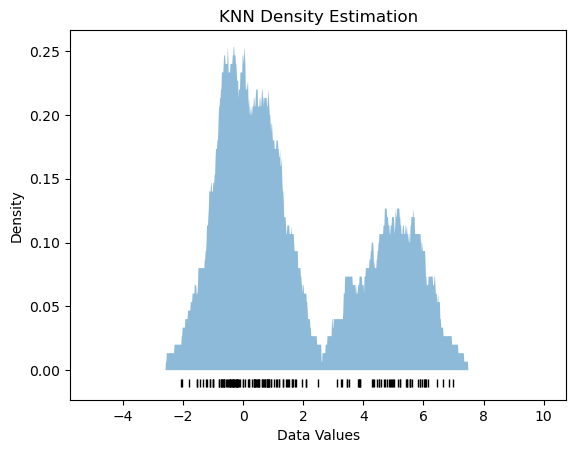

In [8]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# 生成模拟数据
data = np.concatenate([np.random.randn(100), np.random.randn(50) + 5])

# 使用KNN进行密度估计
kde = KernelDensity(kernel='tophat', bandwidth=0.5).fit(data[:, np.newaxis])
x_d = np.linspace(-5, 10, 1000)
log_density = kde.score_samples(x_d[:, np.newaxis])

# 绘制估计的密度
plt.fill_between(x_d, np.exp(log_density), alpha=0.5)
plt.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.title('KNN Density Estimation')
plt.show()

请注意，在上述代码中，我们使用了`tophat`核，这相当于KNN方法。带宽参数`bandwidth`对应于密度估计的平滑程度。

### 4. 优点与缺点

**优点**：
1. KNN是一种非参数方法，不需要对数据的分布做出假设。
2. 当数据量增加时，KNN的估计效果会逐渐接近真实的密度分布。

**缺点**：
1. 当数据维度高时，由于“维度诅咒”，KNN的性能可能会受到影响。
2. 计算密度的计算成本可能较高，特别是当数据集很大时。

总体而言，KNN是一种强大的密度估计方法，尤其适用于中低维度的数据。但在实践中，需要根据具体的应用场景和数据特点来选择合适的k值和带宽参数。

## 在问题中的应用
## 在分类问题中的应用


- 第 $k$ 类的概率
$$
p\left(\mathbf{x} \mid \mathcal{C}_k\right)=\frac{K_k}{{N}_k V}
$$
- 先验概率
$$
p\left(\mathcal{C}_k\right)=\frac{N_k}{N}
$$
- 因此后验概率
$$
p\left(\mathcal{C}_k \mid \mathbf{x}\right) =\frac{p\left(\mathbf{x} \mid \mathcal{C}_k\right) p\left(\mathcal{C}_k\right)}{p(\mathbf{x})} =\frac{\dfrac{K_k}{N_k V} \cdot \dfrac{N_k}{N}}{\dfrac{K}{N V}}=\frac{K_k}{K}
$$

### 小提琴图 (Violin Plot)

当然可以。小提琴图（Violin Plot）是数据可视化中的一种工具，它结合了箱线图和核密度估计的特点，使我们可以更全面地了解数据的分布情况。接下来，我将为您详细介绍小提琴图的相关知识。

### 1. 小提琴图的组成

小提琴图主要由两部分组成：
- **核密度估计**：这部分显示了数据的分布情况。与传统的直方图或密度图相比，小提琴图在垂直方向上对数据进行了对称展示，使得它看起来像一个小提琴。
- **箱线图**：这部分位于小提琴图的中心，显示了数据的五数概括（最小值、第一四分位数、中位数、第三四分位数和最大值）。

### 2. 如何解读小提琴图

- **核密度估计**：小提琴图的宽度表示数据在该值处的密度。较宽的部分意味着数据在此处较为密集，较窄的部分表示数据较为稀疏。
- **箱线图**：中间的箱线图展示了数据的中心趋势和分布。中位数通常用一条线表示，而箱体则表示了数据的四分位范围。

### 3. 使用场景

小提琴图尤其适用于以下场合：
- 当你想要对比一个数值变量在不同类别（或组）中的分布时。
- 当你有多个类别，而每个类别都有相当数量的数据点时。
- 当你不仅关心数据的中心趋势，还关心数据的分布情况时。

### 4. 小提琴图 vs. 箱线图

虽然小提琴图提供了数据的详细分布，但有时简单的箱线图可能更为直观。选择哪种图取决于你想要传达的信息。如果你只关心中心趋势和四分位范围，那么箱线图可能是更好的选择。但如果你还想展示数据的整体分布，那么小提琴图会是一个很好的工具。

### 5. 注意事项

- 小提琴图的核密度估计是基于数据的，因此当数据量较少时，小提琴图可能不太准确。
- 由于小提琴图同时显示了数据的分布和五数概括，所以它可能比其他图形更难解读。确保你的受众能够理解你所展示的图形。

总的来说，小提琴图是一种强大的数据可视化工具，它可以提供比传统的箱线图更多的信息。但与此同时，也需要我们更加小心地解读和使用它。

c:\Users\11234\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\11234\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


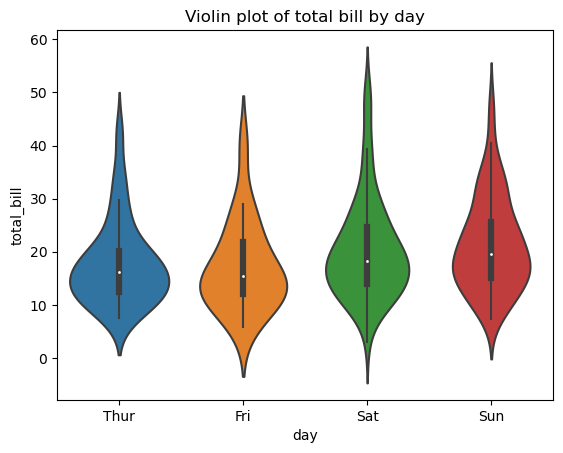

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
tips = sns.load_dataset("tips")

# 创建小提琴图
sns.violinplot(x="day", y="total_bill", data=tips)

# 显示图形
plt.title('Violin plot of total bill by day')
plt.show()

### 在回归问题中的应用


### 2. 核回归

核回归使用权重函数（即核）来为每个观测点分配一个权重。权重取决于观测点与预测点之间的距离。

数学上，对于给定的数据集 $ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $，核回归的估计值为：

$$ \hat{y}(x) = \frac{\sum_{i=1}^n K_h(x - x_i) y_i}{\sum_{i=1}^n K_h(x - x_i)} $$

其中 $ K_h $ 是核函数，h是带宽参数。

### 3. KNN回归

在KNN回归中，对于一个新的输入点x，我们找到训练数据中最接近x的k个观测点，并用它们的平均值作为x的预测值。

$$ \hat{y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i $$

其中 $ N_k(x) $ 是最接近x的k个观测点。

### 4. 局部多项式回归

局部多项式回归在数据的每个部分使用低阶多项式进行拟合。这使得模型能够适应数据的复杂结构，同时保持平滑。

### 5. 代码示例：KNN回归

使用Python的`scikit-learn`库进行KNN回归：

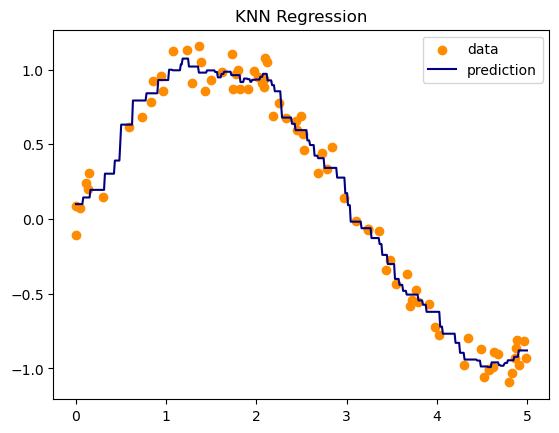

In [9]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

# 生成模拟数据
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.size)

# 使用KNN回归
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)

plt.scatter(X, y, color='darkorange', label='data')
plt.plot(T, y_pred, color='navy', label='prediction')
plt.legend()
plt.title("KNN Regression")
plt.show()

## 非参数估计的优缺点

非参数估计在统计和机器学习领域中都是一个非常重要的方法。下面是非参数估计的优缺点：

### 非参数估计的优点：

1. **灵活性**：非参数方法不依赖于数据的任何特定分布形式或模型假设。因此，它们可以更好地适应数据中的各种模式和结构。

2. **鲁棒性**：由于不做强烈的假设，非参数估计对于模型假设的违背通常更为鲁棒。

3. **易于解释**：某些非参数方法，如决策树，可以提供非常直观和容易理解的模型。

4. **能够处理大量的特征**：对于某些非参数方法，例如随机森林，它们可以处理具有大量特征的数据而不容易过拟合。

### 非参数估计的缺点：

1. **计算复杂性**：由于非参数方法通常不依赖于参数化的模型形式，它们在计算上可能更为昂贵，尤其是当数据量很大时。

2. **需要更多的数据**：**由于非参数方法不依赖于任何特定的分布形式或模型假设，它们通常需要更多的数据来获得与参数方法相同的统计效力。**

3. **过拟合风险**：如果不正确地选择或不调整相关的超参数（如带宽或邻居数量），非参数方法可能对噪声数据过度敏感，导致过拟合。

4. **参数选择**：许多非参数方法需要选择一些参数，如带宽、核选择或邻居数量。这些选择可能对结果有很大的影响，但并不总是容易确定。

5. **存储需求**：**某些非参数方法，如k-近邻算法，需要存储整个数据集以进行预测，这在大数据场景中可能是不切实际的。**

总体上，非参数估计为数据分析师提供了强大的工具，特别是当我们对数据的真实结构和关系没有很好的了解时。但是，它们也带来了自己的一套挑战，需要仔细的考虑和应用。

## 小结

- 非参数估计: 并不假设曲线形状, 从已知数据推断每个分类的分布曲线，并据此进行预测。

- 核密度估计法：固定分块区域体积,
$$
p(\mathbf{x})=\frac{1}{N} \sum_n \frac{1}{h^D} k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right)
$$

- 近邻法：固定分块区域内数据个数, $p\left(\mathcal{C}_k \mid \mathbf{x}\right)=\frac{N_k}{K}$

# 核方法：主要想法

- 前述方法的核心概念是两个点之间的距离（相似性）。

  -本质上所有的学习器都是将临近的样本归类到同一个类别中;关键的不同之处在于 “临近” 的意义。

- 当引入基函数 $\left\{\phi_j(\mathbf{x})\right\}$ 后, 可以基于 $\phi_j(\mathbf{x})$ 重新定义两个 $\mathbf{x}$ 点之间的距离。

  - 相当于先变换坐标, 再在新坐标系下讨论相似性（距离）。

- 既然重要的是距离, 也可以不显式讨论 $\left\{\phi_j(\mathbf{x})\right\}$, 而是直接引入某种形式的距离（内积）的定义, 它的信息由核函数给出。

  - 很多方法都可以结合核方法

### 以线性回归为例

- 定义核函数: $\quad k\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\sum_{j=0}^M \phi_j(\mathbf{x}) \phi_j\left(\mathbf{x}^{\prime}\right) \equiv \phi(\mathbf{x})^{\mathrm{T}} \phi\left(\mathbf{x}^{\prime}\right.$

  - 在最简单的情况下, $\phi(\mathbf{x})=\mathbf{x}$, 上式变成内积, 称为linear kernel。

- 定义 Gram矩阵, $\mathbf{K}=\boldsymbol{\Phi} \boldsymbol{\Phi}^{\mathrm{T}}$, 是 $N \times N$ 对称矩阵, 矩阵元
$$
K_{m n}=\phi\left(\mathbf{x}_m\right)^{\mathrm{T}} \phi\left(\mathbf{x}_n\right) \equiv k\left(\mathbf{x}_m, \mathbf{x}_n\right)
$$
- 则在正则化条件下的预测结果可写成
$$
y(\mathbf{x})=\mathbf{k}(\mathbf{x})^{\mathrm{T}}\left(\mathbf{K}+\lambda \mathbf{I}_n\right)^{-1} \mathbf{t}
$$
-
   - 其中 $\mathbf{k}(\mathbf{x})$ 是 $N$ 维矢量: $k_n(\mathbf{x})=k\left(\mathbf{x}, \mathbf{x}_n\right)$

   - 因此, 结果是由表征距离性质的核函数所决定的, 而且是已知函数值 $\mathbf{t}$ 的某种组合。

### 高斯过程

高斯过程（Gaussian Process，简称 GP）是一种用于非参数贝叶斯方法中的机器学习技术，特别是在回归和优化领域中。它是一个无限维的随机过程，其中任何有限维的子集都服从多元高斯分布。这使得 GP 成为一个灵活而强大的工具，能够捕获数据中复杂的非线性关系。

### 基本概念：

1. **定义**：高斯过程是一个定义在连续域上的随机过程，它的每一个点都有一个相关的随机变量。任何该过程的有限集合的取样都服从多元高斯分布。

2. **均值函数和核函数**：GP 定义时主要由两个组件构成，一个是均值函数 $m(x)$ 和一个是协方差函数或称为核函数 $k(x, x')$。均值函数表示对于输入 $x$，我们期望的输出的均值。协方差函数表示两个输入 $x$ 和 $x'$ 的输出之间的协方差。

数学上，高斯过程可以写作：

$$ f(x) \sim GP(m(x), k(x, x')) $$

其中，$m(x)$ 是均值函数，$k(x, x')$ 是核函数。

### 核函数：

核函数的选择非常关键，因为它定义了输入之间的相似性度量。最常用的核函数是**RBF（径向基函数）**或**高斯核**：

$$ k(x, x') = \sigma^2 \exp \left( -\dfrac{||x - x'||^2}{2l^2} \right) $$

其中，$\sigma^2$ 是方差参数，$l$ 是长度尺度参数。这些参数可以通过优化似然函数来估计。

### 使用 GP 进行预测：

当给定训练数据 $(X, y)$ 和新的测试点 $x_*$ 时，我们可以使用高斯过程得到测试点的预测分布。对于回归问题，这个分布是高斯分布，其均值和方差可以基于训练数据、均值函数和核函数来计算。

### 优点：

1. **预测不确定性**：GP 不仅提供了预测的均值，还给出了预测的不确定性（方差）。
2. **灵活性**：通过选择不同的核函数，GP 可以捕获各种复杂的非线性关系。

### 缺点：

1. **计算复杂性**：对于 $n$ 个训练样本，高斯过程涉及一个 $n \times n$ 的协方差矩阵的求逆，计算复杂性为 $O(n^3)$。
2. **需要选择核函数**：核函数的选择可能对结果产生重大影响。

高斯过程是一个非常强大的工具，特别是在我们对函数的真实形式没有先验知识的情况下。

# 支持向量机 Support Vector Machine SVM

## 数学原理

当然可以！支持向量机（SVM）是一种非常流行的监督学习算法，用于分类和回归任务。这里我们主要关注用于分类的 SVM。首先，我们将从线性可分的场景开始，然后扩展到非线性的场景。

### 1. 线性可分 SVM

假设数据是线性可分的，也就是说存在一个超平面可以将两个类完美地分开。SVM 的目标是找到这样一个超平面，使得它到最近的点的距离（即，margin）最大。

数学上，一个超平面可以表示为：

$$ w \cdot x + b = 0 $$

其中，$w$ 是法向量，决定了超平面的方向；$b$ 是偏置，决定了超平面的位置。

#### 1.1 最大化 Margin

SVM 试图最大化 margin，即两边支持向量到超平面的距离之和。这可以表示为：

$$ \frac{2}{||w||} $$

因此，我们的问题可以表示为：

$$ \max_{w,b} \frac{2}{||w||} $$
$$ \text{subject to } y_i(w \cdot x_i + b) \geq 1, \forall i $$

这是一个优化问题。通常，为了更容易地解决它，我们将其转化为等效的最小化问题：

$$ \min_{w,b} \frac{1}{2} ||w||^2 $$
$$ \text{subject to } y_i(w \cdot x_i + b) \geq 1, \forall i $$

#### 1.2 拉格朗日乘子法

为了解决此优化问题，我们使用拉格朗日乘子法。我们引入拉格朗日乘子 $a_i \geq 0$ 并定义拉格朗日函数：

$$ L(w,b,a) = \frac{1}{2} ||w||^2 - \sum_{i} a_i [y_i(w \cdot x_i + b) - 1] $$

我们的目标是最大化关于 $a_i$ 的上式并最小化关于 $w$ 和 $b$ 的上式。

### 2. 核技巧与非线性 SVM

在许多实际应用中，数据并不是线性可分的。此时，我们可以使用所谓的“核技巧”将数据投影到一个高维空间，在这个空间中数据是线性可分的。

一个核函数 $K(x, x')$ 代表在高维空间中两个向量的内积。流行的核函数有：

- **线性核**：$K(x, x') = x \cdot x'$
- **多项式核**：$K(x, x') = (x \cdot x' + c)^d$
- **RBF（径向基函数或高斯核）**：$K(x, x') = \exp(-\gamma ||x - x'||^2)$
- **sigmoid 核**：$K(x, x') = \tanh(\alpha x \cdot x' + c)$

使用核函数，我们可以在不显式计算在高维空间中的特征的情况下，完成数据的非线性分类。

### 3. 软间隔 SVM

在现实应用中，数据往往存在一些噪声或异常值。为了处理这种情况，SVM 被扩展为软间隔 SVM，其中允许一些数据点可以位于正确的边界之内。为此，我们引入松弛变量 $\xi_i \geq 0$。优化目标修改为：

$$ \min_{w,b,\xi} \frac{1}{2} ||w||^2 + C \sum_{i} \xi_i $$
$$ \text{subject to } y_i(w \cdot x_i + b) \geq 1 - \xi_i, \xi_i \geq 0, \forall i $$

其中，$C$ 是一个正则化参数，它决定了 margin 的宽度与分类错误之间的权衡。

### 总结

SVM 是一个非常强大的分类器，特别是对于中等大小的数据集。它的强大之处在于其核技巧，使其能够在高维空间中有效地分类数据，而无需显式地计算高维空间中的特征。

## 数学基础


### 线性可分体系：类间间隔的最大化 (Maximal Margin)

$$
y(\mathbf{x})=\mathbf{w} \cdot \mathbf{x}+b \Rightarrow y(\mathbf{x})=\mathbf{w}^T \phi(\mathbf{x})+w_0 
\quad \left(w_0=b\right)
$$

- $\mathbf{w}$ 代表了决策面 $(y(\mathbf{x})=\mathbf{0})$ 的垂直方向。因此, $\mathrm{x}$ 与决策面的 (有向) 距离为
$$
d(\mathbf{x})=\mathbf{x} \cdot \widehat{\mathbf{w}}-d_0=\frac{\mathbf{w} \cdot \mathbf{x}}{\|\mathbf{w}\|}-d_0=\frac{y(\mathbf{x})}{\|\mathbf{w}\|}
$$

- $\mathbf{x}_n$ 与决策面的距离可写成
$$
\frac{t_n y\left(\mathbf{x}_n\right)}{\|\mathbf{w}\|}=\frac{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]}{\|\mathbf{w}\|} \quad t_n= \pm 1
$$

- 最小距离, 即间隔/边距（margin）:
$$
\frac{1}{\|\mathbf{w}\|} \min _n\left\{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]\right\}
$$

- **间隔最大化**:
$$
\underset{\mathbf{w}, b}{\arg \max }\left\{\frac{1}{\|\mathbf{w}\|} \min _n\left\{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]\right\}\right\}
$$

#### 求解方法

- 当 $\mathbf{w}$ 与 $b$ 同时增大 $\kappa$ 倍时, $t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]$ 也增大 $\kappa$ 倍, 但 $\frac{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]}{\|\mathbf{w}\|}$ 不变。
- 利用这个性质, 可以令离决策面最近的数据点 $n$ （边界点）满足
$$
t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]=1
$$

则对任何数据点都有
$$
t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right] \geq 1
$$

称为决策平面的规范表示（canonical representation）。
$$
\underset{\mathbf{w}, b}{\arg \max }\left\{\frac{1}{\|\mathbf{w}\|} \min _n\left\{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]\right\}\right\} \Rightarrow \underset{\mathbf{w}, b}{\arg \max }\left\{\frac{1}{\|\mathbf{w}\|}\right\} \Rightarrow \underset{\mathbf{w}, b}{\arg \min } \frac{1}{2}\|\mathbf{w}\|^2
$$

##### 数学背景：Langrange Multiplier & KKT Conditions

- 等式约束 $g_i(\mathbf{x})=0$ 的最优化问题

$$
\begin{array}{l}
\underset{\mathbf{x}}{\arg \min } f(\mathbf{x}) \\
\text { subject to } g_i(\mathbf{x})=0, \quad i=1, \ldots, m
\end{array}
$$

- 不等式约束 $g_i(\mathbf{x}) \leq 0$ 的最优化问题

$$
\begin{array}{l}
\underset{\mathbf{x}}{\arg \min } f(\mathbf{x}) \\
\text { subject to } g_i(\mathbf{x}) \leq 0, \quad i=1, \ldots, m
\end{array}
$$

- 引入拉格朗日乘子 $\alpha_i$:
$$
L(\mathbf{x}, \alpha)=f(\mathbf{x})+\sum_{i=1}^{m} \alpha_{i} g_{i}(\mathbf{x})
$$

- 拉格朗日函数的极值点满足
$$
\begin{array}{l}
\nabla_{\mathbf{x}} L(\mathbf{x}, \alpha)=0 \\
g_{i}(\mathbf{x})=0, \quad i=1, \ldots, m \\
g_{i}(\mathbf{x}) \geq 0, \quad i=1, \ldots, m \\
\end{array}
$$

- 可能解1：（内部）
$$
\begin{array}{l}
\nabla_{\mathbf{x}} g_{i}(\mathbf{x})=0, \quad i=1, \ldots, m \\
g_{i}(\mathbf{x})>0, \quad i=1, \ldots, m \\
\end{array}
$$

- 可能解2：（边界）
$$
\begin{array}{l}
\nabla_{\mathbf{x}, \alpha} L(\mathbf{x}, \alpha)=0 \\
g_{i}(\mathbf{x})=0, \quad i=1, \ldots, m \\
\text{Max:}\quad g_{i}(\mathbf{x}) = 0, \lambda > 0\\
\text{Min:}\quad g_{i}(\mathbf{x}) = 0, \lambda < 0\\
\end{array}
$$

#### Maximal Margin

$\underset{\mathbf{w}, b}{\arg \min } \frac{1}{2}\|\mathbf{w}\|^2$, 约束条件 $t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right] \geq 1$ - 引入拉格朗日因子 $\lambda_n$ :
$$
L(\mathbf{w}, b, \lambda)=\frac{1}{2}\|\mathbf{w}\|^2-\sum_n \lambda_n\left\{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]-1\right\}
$$

约束条件: $\lambda_n\left\{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]-1\right\}=0$
- 其极值满足
$$
\frac{\partial}{\partial \mathbf{w}} L(\mathbf{w}, b, \lambda)=0 \Rightarrow \mathbf{w}=\sum_n \lambda_n t_n \phi\left(\mathbf{x}_n\right)
$$

- 代入 $y(\mathbf{x})=\mathbf{w}^T \phi(\mathbf{x})+b$, 得
$$
y(\mathbf{x})=\sum_{n, i} \lambda_n t_n \phi_i\left(\mathbf{x}_n\right) \phi_i(\mathbf{x})+b=\sum_n \lambda_n t_n k\left(\mathbf{x}, \mathbf{x}_n\right)+b
$$

与核函数 $k\left(\mathbf{x}, \mathbf{x}_n\right)$ 有关。
- $\lambda_n$ 的值需进一步求解。但由于条件
$$
\lambda_n\left\{t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]-1\right\}=0
$$

的存在, 不在间隔边缘 $t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right]=1$ 上的点都有 $\lambda_n=0$, 不出现在求和中。
- **只有间隔边缘的数据点 (支持向量) 才对 $y(\mathbf{x})$ 的计算有贡献!**

$$
\underset{\mathbf{w}, b}{\arg \min } \frac{1}{2}\|\mathbf{w}\|^2 \text {, 约束条件 } t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right] \geq 1
$$
- 这是一个凸优化问题, 目标函数是二次的, 约束条件是线性的。可以用现成的优化包进行求解。
- 更加方便的是将其化成对偶问题, 并用SMO算法进行求解 (复杂, 略)。

#### SMO算法

序列最小优化（Sequential Minimal Optimization，SMO）算法是一种用于解决支持向量机（SVM）训练中二次规划问题的算法。由于SVM的标准优化问题通常是一个大型的二次规划（QP）问题，直接求解这个问题往往是计算上非常昂贵的。SMO算法通过将大的QP问题分解为一系列最小化问题来显著降低这个计算成本。

SMO算法的核心思想是如果我们每次只选择两个变量来优化，那么问题可以简化到一个可以通过解析方法（而非数值优化方法）来求解的程度。在SVM的情况下，这些变量是拉格朗日乘子 $\alpha_i$。

### SVM的二次规划问题

SVM的优化问题可以写成以下形式的二次规划问题：

最小化目标函数：
$$ W(\alpha) = \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m y^{(i)} y^{(j)} \alpha_i \alpha_j K(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) - \sum_{i=1}^m \alpha_i $$

满足条件：
$$ 0 \leq \alpha_i \leq C, \quad \forall i $$
$$ \sum_{i=1}^m \alpha_i y^{(i)} = 0 $$

其中，$ K(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) $ 是核函数，$ C $ 是正则化参数，$ m $ 是训练样本的数量。

### SMO的工作原理

1. **选择变量**：SMO算法每次选择两个拉格朗日乘子 $\alpha_1$ 和 $\alpha_2$ 来进行优化，通常选取违反KKT条件最严重的乘子。

2. **分析问题**：将原问题简化为仅含两个变量 $\alpha_1$ 和 $\alpha_2$ 的优化问题。其他所有的 $\alpha$ 被视为常数。这样，优化问题的目标函数变为只与 $\alpha_1$ 和 $\alpha_2$ 有关的函数。

3. **求解二维子问题**：在 $\alpha_1$ 和 $\alpha_2$ 所在的平面上，目标函数可以用解析方法优化。这个过程需要考虑它们之间的关联（由于等式约束 $\sum \alpha_i y^{(i)} = 0$）和边界条件 $0 \leq \alpha_i \leq C$。

4. **更新变量**：一旦找到最优的 $\alpha_1$ 和 $\alpha_2$，就更新它们，并重新计算模型参数。

5. **终止条件**：如果在一次遍历中所有的拉格朗日乘子都满足KKT条件，或者达到了预定的迭代次数，算法终止。

### 推导更新步骤

在每一步中，选择的两个乘子 $\alpha_1$ 和 $\alpha_2$ 需要遵守以下条件：
$$ y^{(1)} \alpha_1 + y^{(2)} \alpha_2 = \text{常数} $$
$$ L \leq \alpha_2 \leq H $$

其中，$L$ 和 $H$ 是 $\alpha_2$ 的上下界，这些界限由 $\alpha_1$ 和 $\alpha_2$ 的原始值以及 $C$ 决定。

然后我们对于目标函数 $W(\alpha)$ 关于 $\alpha_2$ 进行求导，并设定导数为0，解出 $\alpha_2$ 的最优解，随后利用 $\alpha_1$ 和 $\alpha_2$ 之间的关系来更新 $\alpha_1$。



这是SMO算法的一个非常粗略的描述。真正实施时还涉及到许多实现细节，例如如何选择变量、如何有效计算边界 $L$ 和 $H$、如何处理数值稳定性问题等。在实际应用中，通常会使用现成的库，如LIBSVM，它实现了SMO算法的优化版本。


#### ChatGPT

支持向量机（SVM）是一种用于分类和回归任务的监督学习模型。对于二分类任务，SVM的目标是在特征空间中找到一个超平面，使得两个类别的数据点之间的间隔（margin）最大化。该超平面可以被认为是决策边界。以下是SVM类间间隔最大化的详细介绍：

### 数学表示

首先，我们考虑一个线性可分的二分类问题，其中每个数据点 $\mathbf{x}$ 属于两个类别中的一个，标记为 $y \in \{-1, +1\}$。我们希望找到一个分割平面（在二维中是线，在更高维度中是超平面）可以表示为：

$$ y(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b = 0 $$

这里，$\mathbf{w}$ 是超平面的法向量，而 $b$ 是位移项（有时候称为偏差项）。对于一个新的数据点 $\mathbf{x}$，其分类预测由 $y(\mathbf{x})$ 的符号决定。

### 间隔最大化

为了最大化类间间隔，我们需要最大化数据点到决策边界的最短距离。该距离可用以下公式计算：

$$ \text{margin} = \frac{2}{\|\mathbf{w}\|} $$

其中，$\|\mathbf{w}\|$ 是权重向量的范数。

在最大化间隔的同时，我们还要确保所有的样本点都被正确分类，这意味着：

- 对于 $y_i = 1$ 的数据点，我们有 $ \mathbf{w}^T \mathbf{x}_i + b \geq 1 $
- 对于 $y_i = -1$ 的数据点，我们有 $ \mathbf{w}^T \mathbf{x}_i + b \leq -1 $

这两个条件可以合并成一个条件：

$$ y_i(\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i $$

### 优化问题

将间隔最大化转化为优化问题，我们需要最小化 $\|\mathbf{w}\|$ 或等价地最小化 $\frac{1}{2}\|\mathbf{w}\|^2$（为了计算方便通常最小化它的平方），同时满足上述的约束条件。这是一个凸优化问题，可以用拉格朗日乘子法求解：

$$ L(\mathbf{w}, b, \alpha) = \frac{1}{2}\|\mathbf{w}\|^2 - \sum_{i=1}^n \alpha_i [y_i(\mathbf{w}^T \mathbf{x}_i + b) - 1] $$

其中，$\alpha_i$ 是拉格朗日乘子，对于每个数据点 $i$ 都有一个对应的 $\alpha_i$。优化这个问题涉及到最小化 $L$ 关于 $\mathbf{w}$ 和 $b$，同时最大化关于 $\alpha_i$。

### 非线性情况

对于非线性可分的数据，可以通过引入一个映射函数 $\phi(\mathbf{x})$ 将数据映射到一个更高维的空间，使得它在这个空间内是线性可分的。这种映射使得SVM能够处理更复杂的数据模式。在实践中，通常使用核函数来隐式地进行这种高维映射，如高斯核、多项式核等。

最后，求解出的 $\mathbf{w}$ 和 $b$ 确定了模型，而数据点中只有一部分会对决策边界的位置产

生影响，这些点称为支持向量，因此模型命名为“支持向量机”。

### SVM eg1

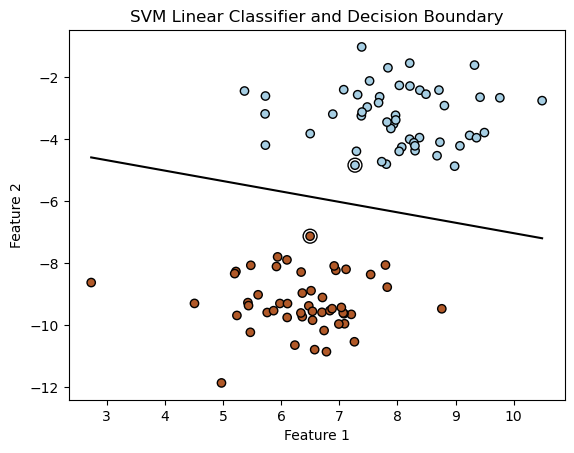

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 生成线性可分的数据集
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# 创建线性SVM分类器
clf = SVC(kernel='linear')
# 训练模型
clf.fit(X, y)

# 获取超平面
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# 绘制超平面
plt.plot(xx, yy, 'k-')

# 绘制支持向量
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            facecolors='none', edgecolors='k', marker='o')

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Linear Classifier and Decision Boundary')
plt.show()

### SVM eg2

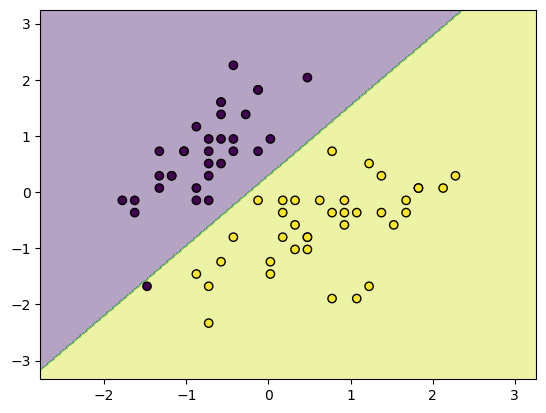

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 仅选取前两个特征
y = iris.target

# 为了简化问题，我们只使用前两类鸢尾花
X = X[y != 2]
y = y[y != 2]

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建SVM模型并训练
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# 可视化决策边界
def plot_decision_boundary(clf, X, y, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# 创建图和轴
fig, ax = plt.subplots()
# 绘制决策边界
plot_decision_boundary(svm_model, X_train, y_train, ax)
plt.show()

### 线性不可分体系：软间隔 (Soft Margin)

- 为了允许误差的存在, 引入松弛变量（slack variables） $\xi_n \geq 0$,使约束条件放宽为
$$
t_n y\left(\mathbf{x}_n\right) \geq 1-\xi_n
$$
$\xi_n$ 可看做是数据点越过margin边界
的距离, 即某种误差。求解时可将其视为独立变量。
- 代价函数写成
$$
C \sum_n \xi_n+\frac{1}{2}\|\mathbf{w}\|^2
$$

#### 求解方法

$$
\underset{\mathbf{w}, b}{\arg \min }\left[C \sum_n \xi_n+\frac{1}{2}\|\mathbf{w}\|^2\right]
$$

约束条件: $t_n\left[\mathbf{w}^T \phi\left(\mathbf{x}_n\right)+b\right] \geq 1-\xi_n, \xi_n \geq 0$
- 通过引入引入拉格朗日函数
$$
L=C \sum_n \xi_n+\frac{1}{2}\|\mathbf{w}\|^2-\sum_n a_n\left[t_n y\left(\mathbf{x}_n\right)-1+\xi_n\right]-\sum_n \mu_n \xi_n
$$

将问题变成（复杂，略）
$$
\underset{\left\{a_n\right\}}{\arg \max }\left[\sum_n a_n-\sum_{m, n} a_m a_n t_m t_n k\left(\mathbf{x}_m, \mathbf{x}_n\right)\right]
$$

约束条件: $0 \leq a_n \leq C, \sum_n a_n t_n=0$ 。一般采用SMO算法求解。

- 线性基
$$
 y(\mathbf{x})=  \sum_n a_n t_n k\left(\mathbf{x}, \mathbf{x}_n\right)+b
$$

- 超参数 $C$ 的作用
  - $C$ 越大, 间隔越小, 但是分类误差越小。
  - $C$ 越小, 间隔越大, 但是分类误差越大。

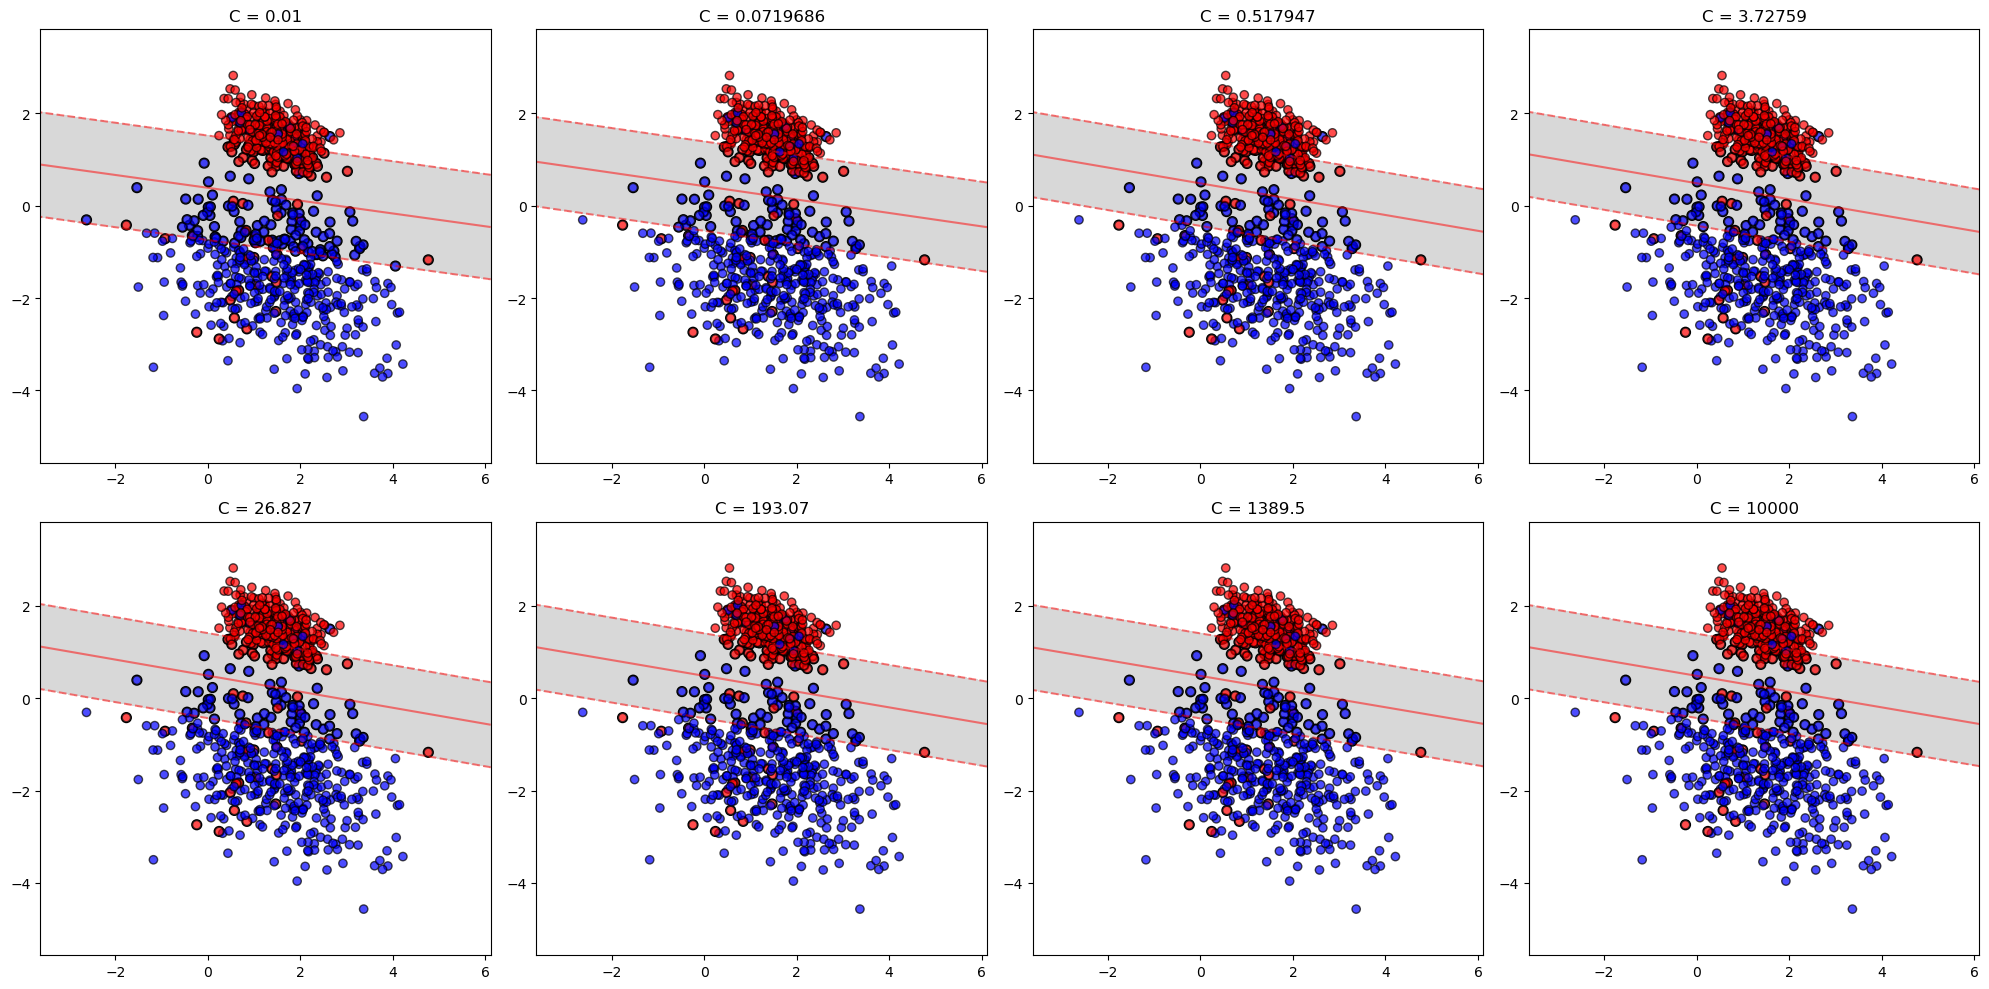

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 生成线性不可分的数据集
X, y = make_classification(n_samples=1200, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1,
                           flip_y=0.1, class_sep=1.5)  # 提高class_sep参数

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的C值
C_values = np.logspace(-2, 4, 8)

# 创建子图
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# 函数：绘制决策边界
def plot_svc_decision_function(model, ax, plot_support=True):
    # 创建网格以绘制决策边界
    xlim = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    ylim = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # 绘制决策边界和边缘
    ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    ax.contourf(XX, YY, Z, colors='grey', levels=[-1, 1], alpha=0.3)
    
    # 绘制支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
                   linewidth=1, facecolors='none', edgecolors='k')

# 训练不同的SVM模型并进行可视化
for i, C in enumerate(C_values):
    ax = axes[i // 4, i % 4]
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)

    # 绘制决策边界和支持向量
    plot_svc_decision_function(svm_model, ax)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', alpha=0.7)
    ax.set_title(f'C = {C:g}')
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

plt.tight_layout()
plt.show()



### 与逻辑回归的联系

- 代价函数可重新写成
$$
\sum_n E_{\mathrm{SV}}\left(y_n t_n\right)+\lambda\|\mathbf{w}\|^2
$$

- 其中
$$
E_{\mathrm{SV}}\left(y_n t_n\right)=\left[1-y_n t_n\right]_{+}
$$
只取其正值，否则为零

- 对于逻辑回归，有
$$
E_{\mathrm{SV}}\left(y_n t_n\right)=E_{\mathrm{SV}}(z)=\ln \left(1+e^{-z}\right)
$$

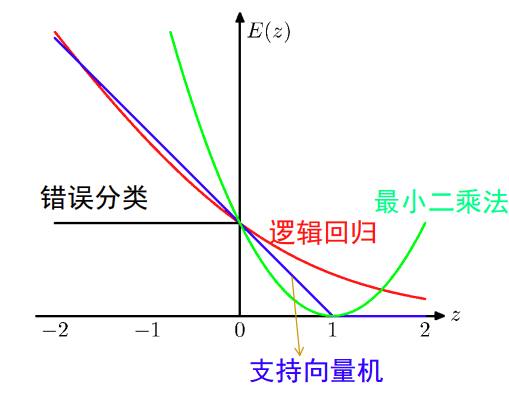

### SVM 用于回归问题

- 回归问题的二乘误差为：
$$
\frac{1}{2} \sum_n\left(y_n-t_n\right)^2+\frac{\lambda}{2}\|\mathbf{w}\|^2
$$

- 借鉴SVM分类中的思想, 将误差定义为
$$
E_{\varepsilon}(y(\mathbf{x})-t)=\left\{\begin{array}{cc}
0, & \text { if }|y(\mathbf{x})-t|<\varepsilon \\
|y(\mathbf{x})-t|-\varepsilon, & \text { otherwise }
\end{array}\right.
$$

- 或者引入松弛变量
$$
\left\{\begin{array}{l}
t_n \leq y\left(\mathbf{x}_n\right)+\varepsilon+\xi_n \\
t_n \geq y\left(\mathbf{x}_n\right)-\varepsilon-\hat{\xi}_n
\end{array}\right.
$$

代价函数变成: $C \sum_n\left(\xi_n+\hat{\xi}_n\right)+\frac{1}{2}\|\mathbf{w}\|^2$

- 同为凸优化, 只有一个优化解。
- 特征数 $M$, 样本数 $N$, 则

  - $N$ 较小 (允许比 $M$ 小), 训练集数据量不够支持我们训练一个复杂的非线性模型, 可选用逻辑回归模型或者不带核函数的支持向量机。

  - 如果 $M$ 较小（例如在 1-1000 之间）, 而且 $N$ 大小中等（1010000之间），可使用高斯核函数的支持向量机。

  - 如果 $M$ 较小, 而 $N$ 较大 (例如大于 50000 ), 则使用支持向量机会非常慢, 解决方案是创造、增加更多的特征, 然后使用逻辑回归或不带核函数的支持向量机。

### 比较
#### 与神经网络的比较
- 神经网络适用性很广，但它的优化问题是非凸的，训练可能非常慢。

- 训练结束后不需要保存训练数据点，预测阶段计算快，在高频交易事务（如股票）中有优势。

#### 与近邻法的比较
- 表面上看，支持向量机很像加权近邻算法。

- 但它只需记住那些用于确定边界的关键例子。

- 近邻算法的边界是锯齿状的，但支持向量机的边界是光滑的。

## 有趣的例子 1
当然，一个有趣且相对复杂的机器学习实例涉及到支持向量机（SVM）是非线性核技巧的使用，这可以帮助我们处理在原始特征空间中不可分的数据。在这个实例中，我们将使用SVM的非线性版本来处理一个复杂数据集，并使用可视化技术来展示其决策边界。

我们将使用**RBF（径向基函数）核**，它是SVM中使用非常广泛的一个核函数。接下来，我们将通过以下步骤进行演示：

1. 创建一个非线性可分的数据集。
2. 使用SVM和RBF核来拟合数据。
3. 可视化决策边界，以及支持向量和边缘。

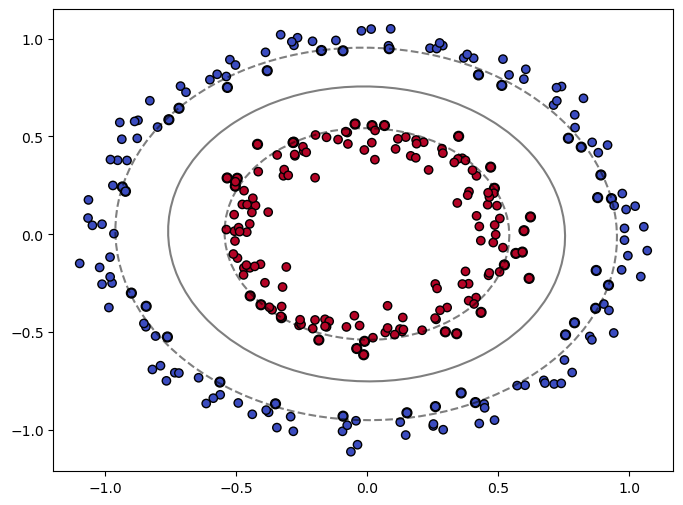

In [19]:
# 首先，我们生成一些非线性可分的数据：

from sklearn.datasets import make_circles

# 生成非线性可分的数据集
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)


# 然后，我们将使用`SVC`类从`sklearn`来创建一个使用RBF核的SVM模型，并拟合我们的数据：

from sklearn.svm import SVC

# 创建并训练模型
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_rbf.fit(X, y)

# 最后，我们可以使用以下代码来创建一个函数，用于绘制决策边界和支持向量：

def plot_svc_decision_boundary(model, ax):
    # 创建网格以绘制决策边界
    xlim = [X[:, 0].min() - 0.1, X[:, 0].max() + 0.1]
    ylim = [X[:, 1].min() - 0.1, X[:, 1].max() + 0.1]
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界和支持向量
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
               linewidth=1, facecolors='none', edgecolors='k')

# 创建图表
fig, ax = plt.subplots(figsize=(8, 6))
plot_svc_decision_boundary(svm_rbf, ax)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.show()


这段代码将产生一幅图像，展示了经过SVM模型训练的数据，其中支持向量被突出显示，并且数据点根据其类别着色。决策边界被绘制成一条实线，而间隔区域则通过虚线表示。由于我们使用的是RBF核，决策边界将是非线性的，可能表现为封闭的形状，完美地围绕着数据点。

这只是SVM可以实现的众多复杂应用中的一个简单例子。在实践中，SVM可以与参数调优、模型选择和特征工程等技术相结合，处理更加复杂的数据集和实际问题。